## Folder Structure

Each independent case has a dedicated folder identified by a five-digit number. Within each of these “case” folders, there are four sub-folders, each of them corresponding to each of the structural multi-parametric MRI (mpMRI) scans, in DICOM format. The exact mpMRI scans included are:

- Fluid Attenuated Inversion Recovery (FLAIR)
- T1-weighted pre-contrast (T1w)
- T1-weighted post-contrast (T1Gd or T1wCE)
- T2-weighted (T2)

![](https://i.ibb.co/T12zwPv/1.png)

## Files
- train/ - folder containing the training files, with each top-level folder representing a subject
- train_labels.csv - file containing the target MGMT_value for each subject in the training data (e.g. the presence of MGMT promoter methylation)
- test/ - the test files, which use the same structure as train/; your task is to predict the MGMT_value for each subject in the test data. NOTE: the total size of the rerun test set (Public and Private) is ~5x the size of the Public test set
- sample_submission.csv - a sample submission file in the correct format


In [ ]:
import os
import json
import glob
import random
import collections

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import cv2
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [2]:
data_dir = '/home/asheesh/Documents/Github/kaggle-rsna-miccai/data/rsna-miccai-brain-tumor-radiogenomic-classification'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

## Check MGMT scores for different subjects and see if the dataset is balanced or not

In [3]:
train_df = pd.read_csv(os.path.join(data_dir, 'train_labels.csv'))
train_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


<AxesSubplot:xlabel='MGMT_value', ylabel='count'>

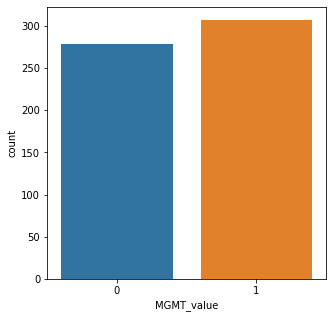

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x="MGMT_value")

## Data Visualization

In [ ]:
def load_dicom(path):
    